In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uvm = pd.read_csv('./TCGA-UVM.htseq_fpkm.tsv', sep='\t')
uvm_g = uvm[uvm['Ensembl_ID'].isin(['ENSG00000111640.13','ENSG00000105679.7'])]
uvm_g = uvm_g.set_index('Ensembl_ID')
uvm_g = uvm_g.rpow(2)-1
for i in uvm_g.columns.values:
    uvm_g[i] = (uvm_g[i]/uvm_g[i].sum())*1000000
uvm_g

,TCGA-VD-A8KB-01A,TCGA-VD-AA8P-01A,TCGA-V4-A9EK-01A,TCGA-YZ-A985-01A,TCGA-WC-A88A-01A,TCGA-WC-A882-01A,TCGA-V4-A9ED-01A,TCGA-WC-A87W-01A,TCGA-VD-AA8O-01A,TCGA-V4-A9EV-01A,...,TCGA-VD-A8KI-01A,TCGA-VD-A8KL-01A,TCGA-V4-A9ET-01A,TCGA-V4-A9EO-01A,TCGA-V4-A9EU-01A,TCGA-WC-A87T-01A,TCGA-WC-AA9A-01A,TCGA-V4-A9EA-01A,TCGA-RZ-AB0B-01A,TCGA-V4-A9F8-01A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000111640.13,934288.962067,960580.720267,870827.006552,948082.655137,952818.479121,981194.144273,943472.099882,888935.771083,911412.515864,954446.321952,...,934084.723752,966355.507232,959330.94674,927775.771118,983731.909175,941917.970591,986698.520584,930003.085815,971768.021837,954708.901675
ENSG00000105679.7,65711.037933,39419.279733,129172.993448,51917.344863,47181.520879,18805.855727,56527.900118,111064.228917,88587.484136,45553.678048,...,65915.276248,33644.492768,40669.05326,72224.228882,16268.090825,58082.029409,13301.479416,69996.914185,28231.978163,45291.098325


In [3]:
skcm = pd.read_csv('./TCGA-SKCM.htseq_fpkm.tsv', sep='\t')
skcm_g = skcm[skcm['Ensembl_ID'].isin(['ENSG00000111640.13','ENSG00000105679.7'])]
skcm_g = skcm_g.set_index('Ensembl_ID')
skcm_g = skcm_g.rpow(2)-1
for i in skcm_g.columns.values:
    skcm_g[i] = (skcm_g[i]/skcm_g[i].sum())*1000000
skcm_g

,TCGA-EE-A2GJ-06A,TCGA-EE-A2GI-06A,TCGA-WE-A8ZM-06A,TCGA-DA-A1IA-06A,TCGA-D3-A51H-06A,TCGA-XV-A9VZ-01A,TCGA-FS-A1ZE-06A,TCGA-D3-A8GB-06A,TCGA-D3-A8GL-06A,TCGA-BF-A5EP-01A,...,TCGA-EE-A2GP-06A,TCGA-EE-A2M6-06A,TCGA-EE-A3J3-06A,TCGA-FS-A1ZF-06A,TCGA-D9-A6EC-06A,TCGA-FR-A8YC-06A,TCGA-EB-A4XL-01A,TCGA-EE-A3AC-06A,TCGA-EE-A3J4-06A,TCGA-BF-A1Q0-01A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000111640.13,998225.848903,993841.095728,999665.255201,997355.271768,998336.786224,999679.718822,959355.736404,989015.564796,999701.462424,994960.854446,...,992858.689583,999142.895535,995013.972586,999776.806911,999972.09498,990580.209984,973818.481682,985285.803162,998685.613803,999514.777359
ENSG00000105679.7,1774.151097,6158.904272,334.744799,2644.728232,1663.213776,320.281178,40644.263596,10984.435204,298.537576,5039.145554,...,7141.310417,857.104465,4986.027414,223.193089,27.90502,9419.790016,26181.518318,14714.196838,1314.386197,485.222641


In [4]:
for i in uvm['Ensembl_ID'].unique():
    if "ENSG00000111640" in i:
        print(i)

ENSG00000111640.13


In [5]:
for j in uvm['Ensembl_ID'].unique():
    if "ENSG00000105679" in j:
        print(j)

ENSG00000105679.7


In [6]:
for i in skcm['Ensembl_ID'].unique():
    if "ENSG00000111640" in i:
        print(i)

ENSG00000111640.13


In [7]:
for j in skcm['Ensembl_ID'].unique():
    if "ENSG00000105679" in j:
        print(j)

ENSG00000105679.7


In [8]:
uvm_t = uvm_g.T
uvm_true = uvm_t.rename(columns={'ENSG00000111640.13':'GAPDH_UVM', 'ENSG00000105679.7':'GAPDHS_UVM'})

In [9]:
skcm_t = skcm_g.T
skcm_true = skcm_t.rename(columns={'ENSG00000111640.13':'GAPDH_SKCM', 'ENSG00000105679.7':'GAPDHS_SKCM'})

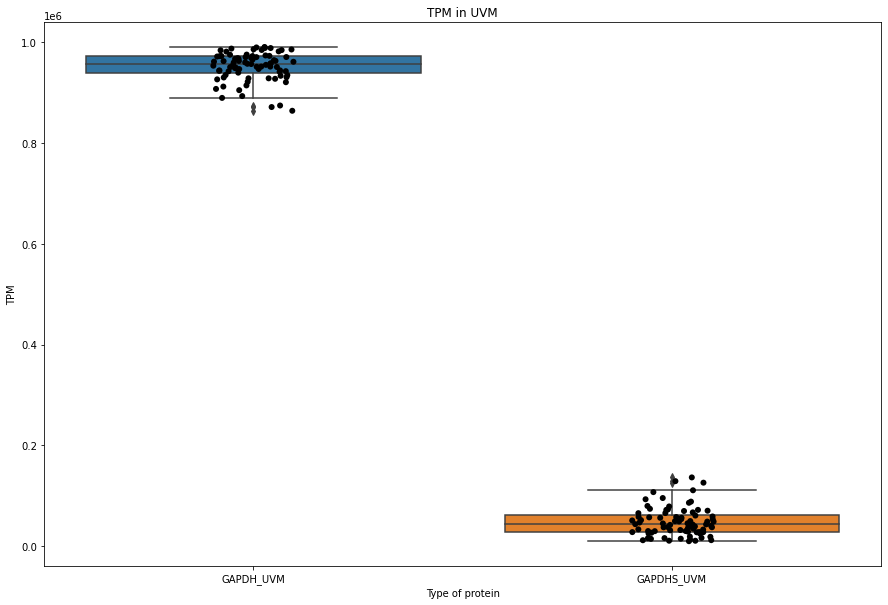

In [10]:
plt.figure(figsize=(15,10))
sns.boxplot(data=uvm_true)
sns.stripplot(data=uvm_true, size=6, color='black')
plt.title("TPM in UVM")
plt.ylabel("TPM")
plt.xlabel("Type of protein")
plt.show()

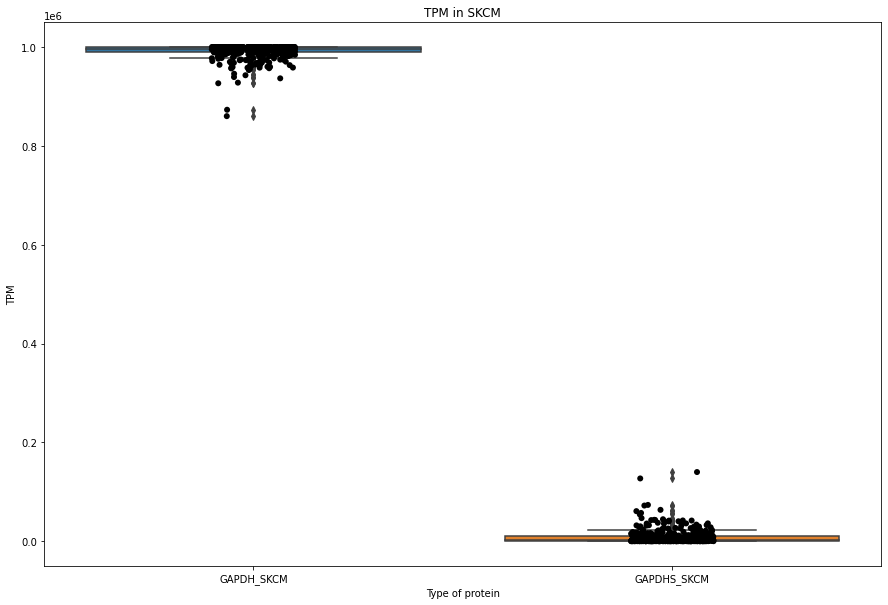

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(data=skcm_true)
sns.stripplot(data=skcm_true, size=6, color='black')
plt.title("TPM in SKCM")
plt.ylabel("TPM")
plt.xlabel("Type of protein")
plt.show()

In [12]:
tcga = pd.concat([uvm_true, skcm_true])
tcga

,GAPDH_UVM,GAPDHS_UVM,GAPDH_SKCM,GAPDHS_SKCM
TCGA-VD-A8KB-01A,934288.962067,65711.037933,NaN,NaN
TCGA-VD-AA8P-01A,960580.720267,39419.279733,NaN,NaN
TCGA-V4-A9EK-01A,870827.006552,129172.993448,NaN,NaN
TCGA-YZ-A985-01A,948082.655137,51917.344863,NaN,NaN
TCGA-WC-A88A-01A,952818.479121,47181.520879,NaN,NaN
...,...,...,...,...
TCGA-FR-A8YC-06A,NaN,NaN,990580.209984,9419.790016
TCGA-EB-A4XL-01A,NaN,NaN,973818.481682,26181.518318
TCGA-EE-A3AC-06A,NaN,NaN,985285.803162,14714.196838
TCGA-EE-A3J4-06A,NaN,NaN,998685.613803,1314.386197


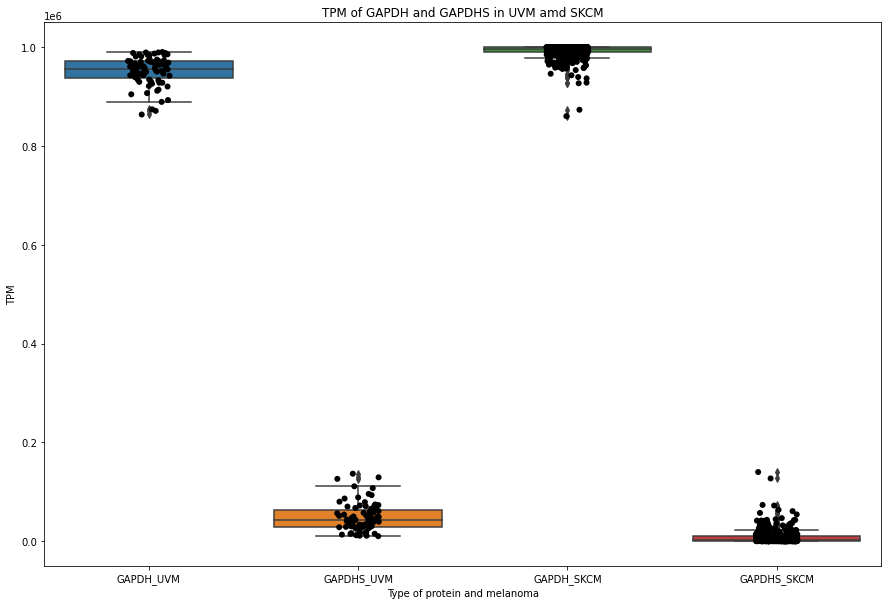

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(data=tcga)
sns.stripplot(data=tcga, size=6, color='black')
plt.title("TPM of GAPDH and GAPDHS in UVM amd SKCM")
plt.ylabel("TPM")
plt.xlabel("Type of protein and melanoma")
plt.show()

## GAPDHS/GAPDH

In [18]:
tcga_tpm_norm = tcga.copy()
tcga_tpm_norm['UVM']=tcga_tpm_norm['GAPDHS_UVM']/tcga_tpm_norm['GAPDH_UVM']
tcga_tpm_norm['SKCM']=tcga_tpm_norm['GAPDHS_SKCM']/tcga_tpm_norm['GAPDH_SKCM']
new_df = tcga_tpm_norm[['UVM','SKCM']].copy()
new_df

,UVM,SKCM
TCGA-VD-A8KB-01A,0.070333,NaN
TCGA-VD-AA8P-01A,0.041037,NaN
TCGA-V4-A9EK-01A,0.148334,NaN
TCGA-YZ-A985-01A,0.054760,NaN
TCGA-WC-A88A-01A,0.049518,NaN
...,...,...
TCGA-FR-A8YC-06A,NaN,0.009509
TCGA-EB-A4XL-01A,NaN,0.026885
TCGA-EE-A3AC-06A,NaN,0.014934
TCGA-EE-A3J4-06A,NaN,0.001316


In [19]:
from matplotlib.pyplot import savefig

<Figure size 1080x720 with 0 Axes>

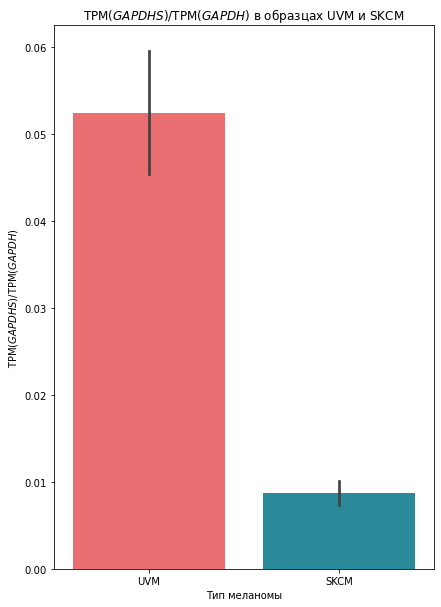

In [20]:
plt.figure(figsize=(15,10))
ax = plt.figure(figsize=(15,10)).add_subplot(121)
#font = {'weight': 'normal', 'size': 16}
sns.barplot(data=new_df, palette=['#ff5a5f', '#1797ad'])
#sns.stripplot(data=tcga_tpm, size=6, color='black')
plt.title("TPM($\it{GAPDHS}$)/TPM($\it{GAPDH}$) в образцах UVM и SKCM")
plt.ylabel("TPM($\it{GAPDHS}$)/TPM($\it{GAPDH}$)")
plt.xlabel("Тип меланомы")
#plt.tick_params(axis='x', colors='#f5f5f5')    #setting up X-axis tick color to red
#plt.tick_params(axis='y', colors='#f5f5f5')
#ax.spines['left'].set_color('#f5f5f5')        # setting up Y-axis tick color to red
#ax.spines['top'].set_color('#f5f5f5')
#ax.spines['bottom'].set_color('#f5f5f5') 
#ax.spines['right'].set_color('#f5f5f5')
#plt.savefig('post1.png', transparent=True)
plt.show()